In [19]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

**Grace Shao**<br>
University of Chicago <br>
graceshaoy2@uchicago.edu

## Research Question and Background

As a fundamental pillar of culture, stories are a reflection of culture, a product of time and place. Horror stories, then, are a reflection of a societal fears, and the boundaries they draw between good and evil, health and perversity, us and them are a reflection of a society’s social state. In analyses of horror, monsters are commonly interpreted as a symbol of a category crisis: "A mixed category, the monster resists any classification built on hierarchy or merely binary opposition, demanding instead a 'system' allowing polyphony" [8]. <br>
<br>
Current popular science fiction stories center around fears of artificial intelligence and the boundaries between human and robot. This fear is rooted in the larger tradition of horror, science fiction, and Gothic stories of piecing together a body from deviance (race, class, gender, sexuality, or technology) and is heavily tied to the production of knowledge.<br>
<br>
Similar to how developments in artificial intelligence encourage creative writers to engage with social, moral, and future implications of technology, Mary Shelley's classic *Frankenstein* was written in context of recent scientific developments. Luigi Galvani had found that frog legs twitched with electric shocks, and Giovanni Aldini found that a recently hanged man's muscles twitched with an electric shock [7]. Additionally, the Enlightenment's central subject of the material versus the spiritual is explored through Frankenstein's monster [3]. <br>
<br>
In *Discipline and Punish*, Michel Foucault analyzes how the Enlightenment's focus on the material versus the spiritual shifted the focus of discipline from the body to the soul. Crime literature followed, moving from the confession and gallows speech to detective fiction. In Gothic literature, as Judith Halberstam argues in *Skin Shows*, crime is embodied within the deviant form monsters [4]. *Frankenstein* has been frequently read through a racial lens, playing on anxieties of Haitian and Jamaican slave rebellions and challenges to white supremacy [5]. <br>
<br>
Halberstam argues that the shift in media from literature to film pushed horror narrow its scope from deviant race, class, and gender to deviant sexuality and gender. Since film's depiction of a monster will always fall short to the reader's imagination, film depends on the explicit violation of female bodies rather than the sight of the monster [7]. She uses *The Silence of the Lambs* to demonstrate how Buffalo Bill's identity crisis is a category crisis of sexual identity. However, this shift is also pushed by the Enlightenment's shift from the body to the soul, pushing horror from physical monstrosity to psychological and cultural monstrosity. Thus, her argument extends to modern horror literature, such as the Hannibal Lecter series, the literary basis for *The Silence of the Lambs*. <br>
<br>
In addition the category crisis of sexuality and gender, modern technological advancements have created category crisis between human and robot, even through representations of aliens, monstrous and technologically advanced.[6]<br>
<br>
The tradition of analyzing horror stories from a qualitative standpoint (psychological, historical, philosophical) is long – here, I approach this argument computationally.


# Method

To analyze trends in speculative fiction, I use data scraped by Carnegie Mellon University. The CMU book dataset is comprised of 16.5K books, with information such as author, published date, and summary from Wikipedia [1]. I consider horror, science fiction, and gothic genres to be of interest in examining fears represented through literature. For a full list of genres included in the analysis, refer to appendix A. <br>
<br>
To analyze the how horror stories are perceived to reflect societal anxieties, I turn to Amazon book review data, which is comprised of 3M reviews of 204.2K books, of which 4K overlap with the CMU dataset [2].

Using a common method for computational text analysis, term frequency-inverse document frequency (TF-IDF), I identify the relevance of topics (monster, robot) within the summary of a book. The summaries were preprocessed using standard methods -- removal of stopwords (e.g. "the"), lemmatization (reducing words to their root, e.g. "running" to "run"), and bigramization (freezing words pairs that appear frequently, e.g. "scary monster" to "scary_monster"). <br>
<br>
Since a majority of the books in the dataset were published recently, there is a baseline growth in relevance of most words. The one-hundred most 'relevant' words in the entire dataset were used to approximate this baseline growth. To get an accurate understanding of the change in relevance of topics of interest, the baseline was subtracted from the change in relevance of monsters and robots.

# Results

In [15]:
sbert_pca = pd.read_csv('data/sbert_pca.csv')
old = alt.Chart(sbert_pca.query('scary and year < 1900')).mark_circle(opacity=1, size=10,color='#300b3a').encode(
    x='x1',
    y='x2',
    tooltip=['Title', 'Author', 'year']
).interactive()

# make a list of 12 hex colors from the magma color scheme
colors = ['#29114a','#1c185a','#20376b','#2a5f7b','#358b89','#419b78','#46ab66','#67bb5d','#99cb6d','#ccdc7e','#ecda90','#fccba4']
recent_decades = []
for i,decade in enumerate([str(x) + 's' for x in range(1900,2020,10)]):
    df = sbert_pca.query('scary and decade == @decade')
    decade_chart = alt.Chart(df).mark_circle(opacity=0.5, size=10,color=colors[i]).encode(
        x='x1',
        y='x2',
        tooltip=['Title', 'Author', 'year']
    ).interactive()
    recent_decades.append(decade_chart)
# make a legend
labels = [' <1900']
labels.extend([str(x) + 's' for x in range(1900,2020,10)])
c = ['#300b3a']
c.extend(colors)
legend = alt.Chart(pd.DataFrame({'decade':labels})).mark_circle(size=100, opacity=1).encode(
    y=alt.Y('decade:N', axis=alt.Axis(title='Decade')),
    color=alt.Color('decade:N', scale=alt.Scale(range=c), legend=None),
    order = alt.Order('decade', sort='ascending')
)
# combine the charts
recent_decades = alt.layer(*recent_decades, old).properties(width=300, height=300)
legend | recent_decades

alt.HConcatChart(...)

*Figure 1: Scatterplot of Speculative Stories*

Using a state-of-the-art machine learning model, S-BERT, each story within speculative fiction were converted to numerical representations. The dimensions were reduced to two principal components, and the result is plotted in Figure 1. A large majority of the stories are from the 1900s onward. With the stories from before the 1900s, we can see a difference in distribution: the center of speculative stories from before the 1900s are in the top left, while the majority of speculative stories from the 1900s onward are clustered in the bottom right. Conceptually, this represents a some combination of change in text (writing style, topic) that coincides with a change in time. 

Although S-BERT is a powerful tool in identifying semantic (dis)similarity, it's not explainable. To preserve explainability, I turn towards less complex methods. TF-IDF is a numerical measure for how relevant a word is to a document, and it accounts for how often a word appears across documents. Thus, since words like "and" appear commonly in many documents, it is deemed less important; while words like "monster" appear less commonly overall, but a document that mentions it often is quite likely about monsters.

In [16]:
monster = pd.read_csv('data/monster.csv',index_col=0)
monster_freq = pd.read_csv('data/monster_freq.csv',index_col=0)
monster_scary_freq = pd.read_csv('data/monster_scary_freq.csv',index_col=0)

line_all = alt.Chart(monster_freq).transform_window(
    rolling_mean='mean(adjusted)',
    frame=[-2, 3]
).mark_line(color='cornflowerblue').encode(
    x=alt.X('year:T', title='Year'),
    y=alt.Y('rolling_mean:Q', title="% of Stories about Monsters (Adjusted)")
)
line_scary = alt.Chart(monster_scary_freq).transform_window(
    rolling_mean='mean(adjusted)',
    frame=[-2, 3]
).mark_line(color='maroon').encode(
    x=alt.X('year:T', title='Year'),
    y=alt.Y('rolling_mean:Q', title="% of Stories about Monsters (Adjusted)")
)
dots = alt.Chart(monster).mark_circle(size=30,opacity=0.5).encode(
    x=alt.X('date:T', title='Year'),
    y=alt.Y('tfidf', title='Monster TF-IDF'),
    color=alt.Color('Genre', scale=alt.Scale(domain=['Horror, Sci-Fi, or Gothic','Other'], range=['maroon', 'cornflowerblue'])),
    # color=alt.Color('Genre', title='Genre', scale=alt.Scale(domain=[True, False], range=['maroon', 'cornflowerblue'])),
    tooltip=alt.Tooltip(['title', 'author'])
)
monster = line_scary + line_all
monster.properties(width=300) | dots.properties(width=300)

alt.HConcatChart(...)

*Figure 2: Relevance of Monsters*

Using TF-IDF to measure the relevance of monsters, we are able to trace the change in relevance across time between genres, as well as identify data points of interest. In this analysis, the words 'monster', 'vampire', 'beast', 'brute', 'creature', 'ghoul', 'demon', 'goblin', 'devil', 'ghost', and 'werewolf' are used to identify monsters in stories.<br>
In Figure 2, the left figure demonstrates the growth in the relevance of monsters in speculative fiction in relation to other genres. The right figure provides information on specific data points: *Frankenstein* stands out as an early story about monsters.

In [17]:
robot = pd.read_csv('data/robot.csv',index_col=0)
robot_freq = pd.read_csv('data/robot_freq.csv',index_col=0)
robot_scary_freq = pd.read_csv('data/robot_scary_freq.csv',index_col=0)

line_all = alt.Chart(robot_freq).transform_window(
    rolling_mean='mean(adjusted)',
    frame=[-2,3]
).mark_line(color='cornflowerblue').encode(
    x=alt.X('year:T', title='Year'),
    y=alt.Y('rolling_mean:Q', title='% of Stories about Robots (Adjusted)')
)
line_scary = alt.Chart(robot_scary_freq).transform_window(
    rolling_mean='mean(adjusted)',
    frame=[-2,3]
).mark_line(color='maroon').encode(
    x=alt.X('year:T', title='Year'),
    y=alt.Y('rolling_mean:Q', title='% of Stories about Robots (Adjusted)')
)
dots = alt.Chart(robot).mark_circle(size=30,opacity=0.5).encode(
    x=alt.X('date:T', title='Year'),
    y=alt.Y('tfidf', title='Robot TF-IDF'),
    color=alt.Color('Genre', scale=alt.Scale(domain=['Horror, Sci-Fi, or Gothic', 'Other'], range=['maroon', 'cornflowerblue'])),
    # color=alt.Color('Genre', title='Genre', scale=alt.Scale(domain=[True, False], range=['maroon', 'cornflowerblue'])),
    tooltip=alt.Tooltip(['title', 'author'])
)
robot = line_scary + line_all
robot.properties(width=300) | dots.properties(width=300)

alt.HConcatChart(...)

*Figure 3: Relevance of Robots*

In this analysis, the words 'robot', 'android', 'cyborg', 'automaton', 'droid', and 'humanoid' are used to identify robots in stories. Since the first use of the word 'robot' was in 1920, I have limited the analysis here to 1920 onwards.<br>
In Figure 3, the left figure demonstrates the growth in the relevance of robots in speculative fiction in relation to other genres. The right figure provides information on specific data points: Isaac Asimov's works stand out as particularly focusing on robots.

Book summaries directly capture the relevance of words like 'robot' and 'monster', but they do not show much in the context of writing. To demonstrate the value in further analysis, I used Amazon book reviews to identify the existence of signs in context through analyses of stories. Limited by the overlap between the datasets and the number of reviews for books, I focus on two books with many reviews: *Frankenstein* and *Hannibal*.

In [31]:
f = pd.DataFrame({'Historical Term':['galvanism','rosseau','slavery','slave','imperialism'],'TF-IDF sum':[0.9831628, 0., 2.53565699, 0., 0.54285061]})
f

,Historical Term,TF-IDF sum
0,galvanism,0.983163
1,rosseau,0.000000
2,slavery,2.535657
3,slave,0.000000
4,imperialism,0.542851


*Table 1: Relevance of Historical Terms in* Frankenstein *Reviews*

Through the literature review, I manually choose words relevant to the historical context of *Frankenstein*, and summed the TF-IDF score across *Frankenstein* reviews. In Table 1, we can see that galvanism, slavery, and imperialism are words that are brought into discussions of *Frankenstein*.

In [33]:
h = pd.DataFrame({'Historical Term':['gender','sexuality','queer','homophobia','homophobic'],'TF-IDF sum':[0.18782966, 0.25971712, 0. , 0.16296904, 0.61624091]})
h

,Historical Term,TF-IDF sum
0,gender,0.187830
1,sexuality,0.259717
2,queer,0.000000
3,homophobia,0.162969
4,homophobic,0.616241


*Table 2: Relevance of Historical Terms in* Hannibal *Reviews*

Similarly, I manually choose words relevant ot the historical context of *Hannibal*, and summed the TF-IDF score across *Hannibal* reviews. In Table 2, we can see that gender, sexuality, homophobia, and homophobic are words that are brought into discussions of *Hannibal*.

# Conclusion

In leveraging a modern computational approach, I demonstrated value in taking advantage of developments in natural language processing and data collection in traditionally qualitative fields of study. Using TF-IDF, I was able to show the growth in relevance of monsters and robots throughout time, and the presence of a connection between books and their context. 
In this analysis, I have shown how the presence of a cultural trend can be identified and traced through computational methods. <br>
<br>
Future work on this topic could gather more data, especially on older texts since CMU's dataset was limited. Additionally, the CMU summaries and Amazon reviews dataset could be joined with greater overlap using fuzzy matching -- with limited computational power, I performed a basic cleaning (removal of punctuation, stopwords), but common fuzzy matching techniques such as Levenshtein distance and vectorizers would increase the overlap. More data on book analyses could also be scraped from academic articles since they focus more on contextual analyses rather than quality and content recommendation to other readers.

# Appendix

A. Genres included in "speculative fiction": horror, gothic, science fiction, alien, biopunk, cyberpunk, ghost, paranormal, science fantasy, speculative fiction, steampunk, supernatural, time travel, techno, time travel, vampire, zombie.

B. 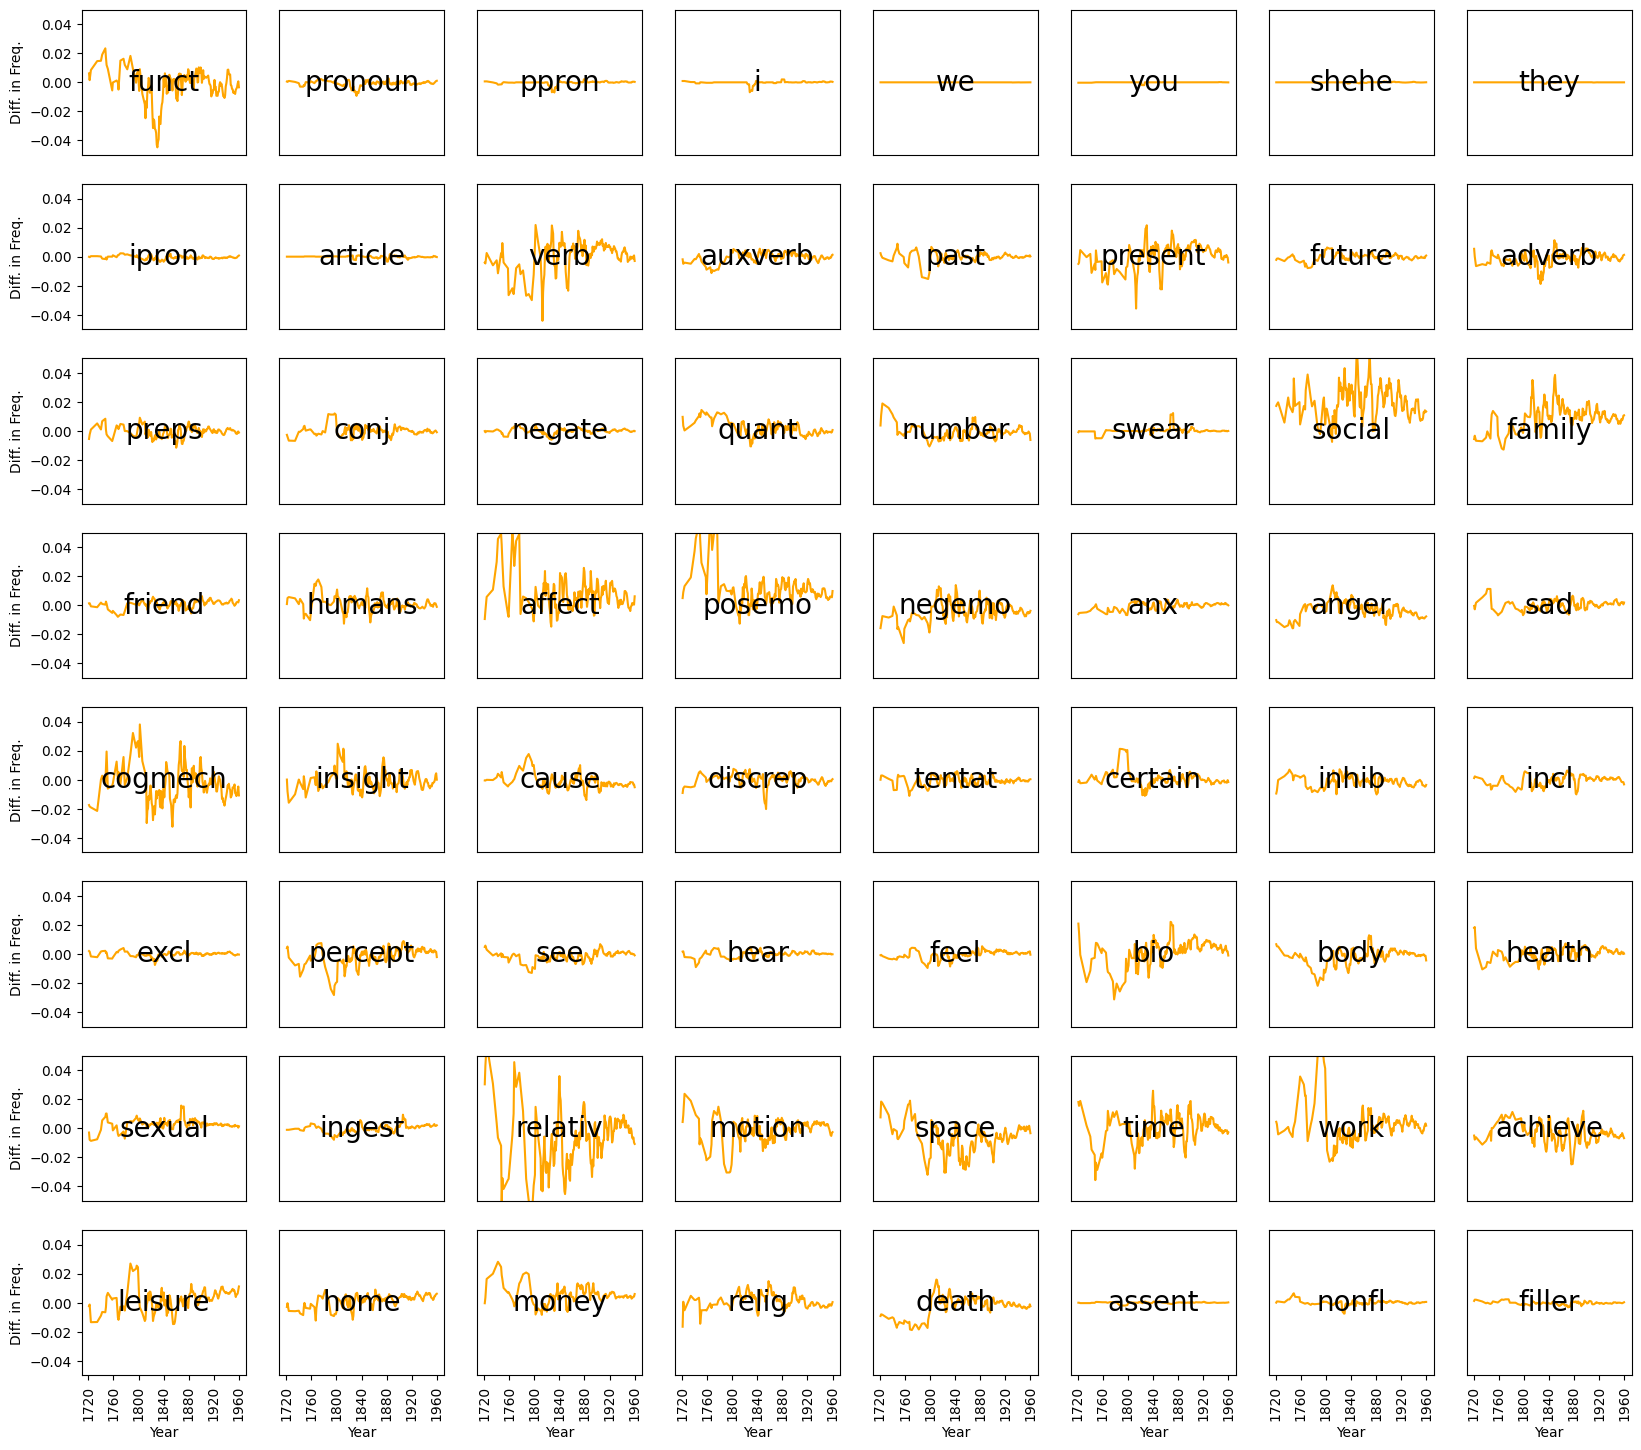 *Figure 3: Changes in LIWC topic frequency (Spectulative Fiction - Other genres)*

# References

[1] Bamman, David. *CMU Book Summary Dataset*. Accessed March 11, 2023. https://www.kaggle.com/datasets/ymaricar/cmu-book-summary-dataset <br>
<br>
[2] Bekheet, Mohamed. *Amazon Book Review Dataset*. Accessed March 11, 2023. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews <br>
<br>
[3] Dolar, Mladen. “‘I Shall Be with You on Your Wedding-Night’: Lacan and the Uncanny.” October 58 (1991): 5–23. https://doi.org/10.2307/778795.<br>
<br>
[4] Halberstam, Judith., Halberstam, Jack. *Skin Shows: Gothic Horror and the Technology of Monsters*. United Kingdom: Duke University Press, 1995.<br>
<br>
[5] Malchow, H. L. “Frankenstein’s Monster and Images of Race in Nineteenth-Century Britain.” Past & Present, no. 139 (1993): 90–130. http://www.jstor.org/stable/651092.<br>
<br>
[6] McLeod, Melissa. *South Atlantic Review* 75, no. 3 (2010): 156–59. http://www.jstor.org/stable/41635645.<br>
<br>
[7] Ruston, Sharon. “The Science of Life and Death in Mary Shelley's Frankenstein.” The Public Domain Review. Accessed March 11, 2023. https://publicdomainreview.org/essay/the-science-of-life-and-death-in-mary-shelleys-frankenstein. <br>
<br>
[8] *The Monster Theory Reader*. United States: University of Minnesota Press, 2020.
